# comparing termination time dependence on domain size
Tim Tyree<br>
6.10.2025

In [1]:
from lib.my_initialization import *
parse_fortranic_tip_pos

<function lib.utils.parse_tip_pos.parse_fortranic_tip_pos(input_dir)>

In [2]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# define module

In [3]:
def gener_conditional_termination_times(log_folder_parquet,
                                        N0=2,
                                        seed = 42,
                                        nv_once_every=10,
                                        constrain_to_N0=True,
                                        return_particle_numbers=False,
                                        **kwargs):
    """
    Example Usage:
t_lst,nv_lst = gener_conditional_termination_times(log_folder_parquet,N0=2,seed=42,nv_once_every=10,
                                        constrain_to_N0=True,return_particle_numbers=False)#,**kwargs)
    """
    t_lst=[]
    nv_lst=[]
    np.random.seed(seed)
    for fn in os.listdir(log_folder_parquet):
        try:
            trial_num = eval(fn.split('=')[1])
            # load tip position data
            g=load_parquet_by_trial_num(trial_num=trial_num,folder_parquet=log_folder_parquet)
            n_series = g.groupby(by='t')['n'].min()
            t0_values = n_series[n_series==N0].index.values
            tf = n_series.index.values.max()
            t_values = tf-t0_values
            #record
            t_lst.extend(t_values)
            if len(t_values)>0 and return_particle_numbers:
                nv = g.groupby('t')['n'].mean()[::nv_once_every] #once every 10ms
                nv = nv[nv%2==0]
                if constrain_to_N0:
                    t0 = np.random.choice(t0_values)
                    nv = nv[nv.index.values>=t0].copy()
                nv_lst.extend(nv)
        except IndexError as e:
            pass
    return t_lst,nv_lst
        #print(f"IndexError for {fn}: {e}")
# n_series.max()

# plot termination versus domain size for the full models

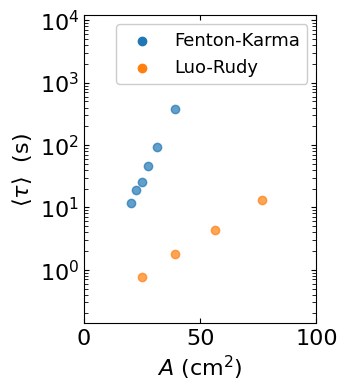

(0.0, 100.0, 0.13850549065122997, 12000.0)

In [4]:
data_folder = f"{nb_dir}/Data/full_results"
os.path.exists(data_folder)



Nbar_dir = os.path.join(data_folder,'Nbar_vs_A_full.csv')
taubar_dir = os.path.join(data_folder,'taubar_vs_A_full.csv')
df_Nbar = pd.read_csv(Nbar_dir)
df_taubar = pd.read_csv(taubar_dir)
# df_taubar
# df_Nbar



from scipy.optimize import dual_annealing
#only magnitude is to be varied
def comp_ss_err(x,*args):
    A_values,tau_values,powr,navg = args
    tau_pred_values = x * (2/A_values)**(powr) * np.exp(A_values*navg*powr/2)
    se = (tau_values-tau_pred_values) ** 2
    sse = np.sum(se)
    #return sse
    #smpe = np.sum(np.log(tau_pred_values/tau_values))
    smpe = np.mean( se / tau_values**2 )
    return smpe


xfk = df_taubar[df_taubar['model_name']=='FK']['A'].values
yfk = df_taubar[df_taubar['model_name']=='FK']['taubar'].values
xlr = df_taubar[df_taubar['model_name']=='LR']['A'].values
ylr = df_taubar[df_taubar['model_name']=='LR']['taubar'].values


# Mp = dict_fit_birth_fk['M']
# nup = dict_fit_birth_fk['m']
# Mm = dict_fit_death_fk['M']
# num = dict_fit_death_fk['m']
model_name='Fenton-Karma'
A_values = xfk
tau_values = yfk


# Mp = dict_fit_birth_lr['M']
# nup = dict_fit_birth_lr['m']
# Mm = dict_fit_death_lr['M']
# num = dict_fit_death_lr['m']
# model_name='Luo-Rudy'
# A_values = xlr
# tau_values = ylr

# #simulated annealing fit 
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# tau_pred_foo = lambda x: x * (2/A_values)**(powr) * np.exp(A_values*navg*powr/2)


#fk
# mag=2.033588801144e+00 ± 0.000000000000e+00
mag=2.0335888011441683
# res_again.x=array([2.0335888])
# # magfk=1.566390007127e+00 #± 3.762187006373e-09 #1e3 epochs
# # magfk=1.566390008379e+00 #± 5.014229476075e-09 #1e4 epochs
magfk = mag

maglr=9.319636219057e-01 #± 3.981174279133e-10 #1e3 epochs
maglr=9.319636257483e-01 #± 3.444428298138e-09 #1e4 epochs
maglr = mag


# Mp = dict_fit_birth_fk['M']
# nup = dict_fit_birth_fk['m']
# Mm = dict_fit_death_fk['M']
# num = dict_fit_death_fk['m']
model_name='Fenton-Karma'
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# yfk_pred = magfk * (2/xfk)**(powr) * np.exp(xfk*navg*powr/2)
# powrfk = float(powr)
# navgfk = float(navg)
# tau_pred_foofk = lambda x: float(magfk) * (2/x)**float(powrfk) * np.exp(x*float(navgfk*powrfk/2))


# Mp = dict_fit_birth_lr['M']
# nup = dict_fit_birth_lr['m']
# Mm = dict_fit_death_lr['M']
# num = dict_fit_death_lr['m']
model_name='Luo-Rudy'
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# ylr_pred = maglr * (2/xlr)**(powr) * np.exp(xlr*navg*powr/2)
# tau_pred_foolr = lambda x: float(maglr) * (2/x)**float(powr) * np.exp(x*float(navg*powr/2))


#plot the simulated annealing fits
figsize=(3,4)
fontsize=15
alpha=0.7
fig,ax=plt.subplots(figsize=figsize)
ax.scatter(xfk,yfk,c='C0',alpha=alpha,label='Fenton-Karma')
ax.scatter(xlr,ylr,c='C1',alpha=alpha,label='Luo-Rudy')
# # ax.scatter(xfk,yfk_pred,c='k',alpha=alpha,marker='+')#,label='Fenton-Karma')
# # ax.scatter(xlr,ylr_pred,c='k',alpha=alpha,marker='+')#,label='Luo-Rudy')
# # ax.scatter([A_fk],[tau_fk],marker='o',edgecolor='k',c='C0',#'k',
# #            alpha=1,label='Fenton-Karma')
# # ax.scatter([A_lr],[tau_lr],marker='o',edgecolor='k',c='C1',#c='k',
# #            alpha=1,label='Luo-Rudy')
# # xv=np.linspace(0,40,10)
# # ax.plot(xv,taubar0fk*np.exp(xv/A0fk),':',color='gray')#,'k--',lw=2)
# # xv=np.linspace(0,80,10)
# # ax.plot(xv,taubar0lr*np.exp(xv/A0lr),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,40,10)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foofk(xv),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foolr(xv),':',color='gray')#,'k--',lw=2)

ax.set_xticks([0,50,100,150])

# format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$\tau$  (s)',fontsize=16)
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$\langle\tau\rangle$  (s)',fontsize=16)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
# ax.set_ylim([1e-2,100])
# # AddLegend(ax=ax,xy=(-0.12,0.240),fontsize=fontsize-3)
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,alpha=1.)#,frameon=False,ncol=1)
# leg.set_alpha(1.)
# , edgecolor="black")
leg.get_frame().set_alpha(None)
# leg.get_frame().set_facecolor((1, 1, 1, 1))
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.set_ylim([0.31392551380514033, 4e9])
ax.set_xlim([0.,100])
ax.set_ylim([0.13850549065122997,12000])
# AddLege nd(ax=ax,xy=(0.05,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.7,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.4,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
# ax.tick_params(axis='y', which='minor', left=True)
# plt.minorticks_on()
plt.show()
ax.axis()
#og src: http://localhost:8888/notebooks/Simulating%20the%20paired%20birth%20death%20process.ipynb


# DONE: find out which L to use for each model

In [5]:
# L_values_fk = np.around(np.sqrt(xfk),5)
# L_values_lr = np.around(np.sqrt(xlr),5)
L_values_fk = np.array([4.5  , 4.75 , 5.   , 5.25 , 5.625, 6.25 ])
L_values_lr = np.array([5.  , 6.25, 7.5 , 8.75])

# DONE: dev next run

# DONE: time permitting, eat something.

# DONE: download the results and name

# DONE: parse results

In [6]:
# TODO: plot against particle model (run #46, N=2000 sims per data point)
# taul_dir = f"{nb_dir}/data/osg_output/run_46_tau_vs_L.csv"
taul_dir = f"{nb_dir}/data/osg_output/run_48_tau_vs_L.csv"
df_taul = pd.read_csv(taul_dir)
df_taul['A'] = df_taul['L'] ** 2

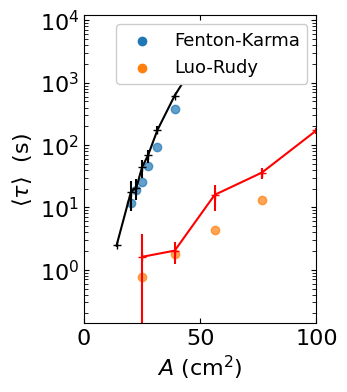

(0.0, 100.0, 0.13850549065122997, 12000.0)

In [7]:
figsize=(3,4)
fontsize=15
alpha=0.7
max_num_points_to_show = 4
fig,ax=plt.subplots(figsize=figsize)
# color_lst = ['C0','C1']
color_lst = ['k','r']
#plot particle model results
for i,(D,g) in enumerate(df_taul.groupby('D')):
    color = f"C{i}"
    color = color_lst[i]
#     g.plot.scatter(x='A',y='tau',color=color,ax=ax,marker='+')
    ax.errorbar(g['A'], g['tau'], yerr=g['Delta_tau'],color=color,marker='+')
    
#plot full model results
ax.scatter(xfk,yfk,c='C0',alpha=alpha,label='Fenton-Karma')
ax.scatter(xlr,ylr,c='C1',alpha=alpha,label='Luo-Rudy')
#plot the simulated annealing fits
# # ax.scatter(xfk,yfk_pred,c='k',alpha=alpha,marker='+')#,label='Fenton-Karma')
# # ax.scatter(xlr,ylr_pred,c='k',alpha=alpha,marker='+')#,label='Luo-Rudy')
# # ax.scatter([A_fk],[tau_fk],marker='o',edgecolor='k',c='C0',#'k',
# #            alpha=1,label='Fenton-Karma')
# # ax.scatter([A_lr],[tau_lr],marker='o',edgecolor='k',c='C1',#c='k',
# #            alpha=1,label='Luo-Rudy')
# # xv=np.linspace(0,40,10)
# # ax.plot(xv,taubar0fk*np.exp(xv/A0fk),':',color='gray')#,'k--',lw=2)
# # xv=np.linspace(0,80,10)
# # ax.plot(xv,taubar0lr*np.exp(xv/A0lr),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,40,10)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foofk(xv),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foolr(xv),':',color='gray')#,'k--',lw=2)
ax.set_xticks([0,50,100,150])
# format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$\tau$  (s)',fontsize=16)
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$\langle\tau\rangle$  (s)',fontsize=16)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
# ax.set_ylim([1e-2,100])
# # AddLegend(ax=ax,xy=(-0.12,0.240),fontsize=fontsize-3)
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,alpha=1.)#,frameon=False,ncol=1)
# leg.set_alpha(1.)
# , edgecolor="black")
leg.get_frame().set_alpha(None)
# leg.get_frame().set_facecolor((1, 1, 1, 1))
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.set_ylim([0.31392551380514033, 4e9])
ax.set_xlim([0.,100])
ax.set_ylim([0.13850549065122997,12000])
# AddLege nd(ax=ax,xy=(0.05,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.7,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.4,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
# ax.tick_params(axis='y', which='minor', left=True)
# plt.minorticks_on()
plt.show()
ax.axis()
#og src: http://localhost:8888/notebooks/Simulating%20the%20paired%20birth%20death%20process.ipynb

## Nota bene: ibid is comparing apples to oranges
$\langle \tau \rangle \neq \langle \tau(N=2) \rangle

# TODO: recompute tau from full models but conditioned on $N_0=2$

In [8]:
def get_fn(inptfldr,fn1 = 'tippos_per_c_001',fn2 = 'tippos_per_001'):
    it = os.listdir(inptfldr)
    if fn1 in it:
        return fn1
    elif fn2 in it:
        return fn2
    raise Exception(f"Warning: fn not found in {inptfldr}")

In [9]:
#load fortranic tip positions
printing=True
nb_dir_ = '/Users/timothytyree/Documents/GitHub/care/notebooks'
# folder=f"{nb_dir_}/Data/from_wjr/positions_fk/200x200"
# folder=f"{nb_dir_}/Data/from_wjr/positions_fk/"
# fn = 'tippos_per_c_001'
folder=f"{nb_dir_}/Data/from_wjr/positions_lr/"
# fn = 'tippos_per_001'
fldr_lst = sorted([x for x in os.listdir(folder) if x[0]!='.'])
width_lst = [x.split('x')[0] for x in fldr_lst]
height_lst = [x.split('x')[1] for x in fldr_lst]
parea_lst = [eval(x.replace('x','*')) for x in fldr_lst]
lfactor = 5/200 #cm/pixel
A_values = (lfactor **2) * np.array(parea_lst)
A_values_lr = A_values.copy()
L_values_lr = np.sqrt(A_values_lr)
print(f"{A_values_lr=}")

folder=f"{nb_dir_}/Data/from_wjr/positions_fk/"
# fn = 'tippos_per_c_001'
# folder=f"{nb_dir_}/Data/from_wjr/positions_lr/200x200"
# fn = 'tippos_per_001'
fldr_lst = sorted([x for x in os.listdir(folder) if x[0]!='.'])
parea_lst = [eval(x.replace('x','*')) for x in fldr_lst]
# parea_lst = []
# for x in fldr_lst:
#     try:
#         parea_lst.append(eval(x.replace('x','*')))
#     except NameError as e: 
#        pass
lfactor = 5/200 #cm/pixel
A_values = (lfactor **2) * np.array(parea_lst)
L_values = np.sqrt(A_values)
A_values_fk = A_values.copy()
L_values_fk = np.sqrt(A_values_fk)
print(f"{A_values_fk=}")

print(f"{L_values_lr=}")
print(f"{L_values_fk=}")

A_values_lr=array([ 25.    ,  39.0625,  56.25  ,  76.5625, 100.    ])
A_values_fk=array([14.0625  , 25.      , 39.0625  , 50.055625, 76.5625  ])
L_values_lr=array([ 5.  ,  6.25,  7.5 ,  8.75, 10.  ])
L_values_fk=array([3.75 , 5.   , 6.25 , 7.075, 8.75 ])


In [10]:
# df_taul


In [11]:
!ls /Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/150x150
#TODO: get tippos_per_c_001 for each folder

positions
tippos_per_c_001
tippos_per_c_001_annihilation_msr.csv
tippos_per_c_001_annihilation_range_timeseries.pkl
tippos_per_c_001_creation_range_timeseries.pkl


In [12]:
use_save_df_to_parquet_by=True
use_save_df_to_parquet_by=False
for i,(L,fldr) in enumerate(zip(L_values,fldr_lst)):
    inptfldr = os.path.join(folder,fldr)
    try:
        fn = get_fn(inptfldr,fn1 = 'tippos_per_c_001',fn2 = 'tippos_per_001')
    except Exception as e:
        print(e)
        fn = None
    if fn is not None:
        input_dir = os.path.join(folder,fldr,fn)
        log_folder_parquet=f'{folder}/{fldr}/positions'
        print(input_dir)
    #     print(os.listdir())
        assert os.path.exists(input_dir)
        if use_save_df_to_parquet_by or not os.path.exists(log_folder_parquet):
            df_log=parse_fortranic_tip_pos(input_dir)
            assert df_log.shape[0]>0
            #partition df_log into a folder of tip logs
            save_df_to_parquet_by(df_log,log_folder_parquet,by='trial_num',compression='snappy',index=None)
            print(f"saved to spiral tip positions to {log_folder_parquet=}")
    #         #determine width and height of the computational domain input the discretization
    #         width,height=df_log.describe().loc['max'][['x','y']].values.T
            del df_log
    #     else:
    #         width = width_lst[i]
    #         height = height_lst[i]
    #determine width and height of the computational domain input the discretization
        width = width_lst[i]
        height = height_lst[i]
    #     width=200
    #     height=200
    width,height

/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/150x150/tippos_per_c_001
/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001
/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/250x250/tippos_per_001


In [13]:
N0=2
constrain_to_N0=True
t_lst=[]
nv_lst=[]
np.random.seed(42)
for fn in os.listdir(log_folder_parquet):
    try:
        trial_num = eval(fn.split('=')[1])
        # load tip position data
        g=load_parquet_by_trial_num(trial_num=trial_num,folder_parquet=log_folder_parquet)
        n_series = g.groupby(by='t')['n'].min()
        t0_values = n_series[n_series==N0].index.values
        tf = n_series.index.values.max()
        t_values = tf-t0_values
        if len(t_values)>0:
            #record
            t_lst.extend(t_values)
    #         nv = g.groupby('t')['n'].mean()[::100] #once every 100ms
            nv = g.groupby('t')['n'].mean()[::10] #once every 10ms
            nv = nv[nv%2==0]
            if constrain_to_N0:
                t0 = np.random.choice(t0_values)
                nv = nv[nv.index.values>=t0].copy()
            nv_lst.extend(nv)
    except IndexError as e:
        pass
        #print(f"IndexError for {fn}: {e}")
# n_series.max()

In [14]:
#print summary stats for distribution of termination times
tau_values_fk = np.array(t_lst)
tau_values = tau_values_fk.copy()
meant,Delta_meant,num_obs,p_normal=comp_mean_bootstrap_uncertainty(tau_values)
print(f"{meant=},{Delta_meant=},{num_obs=},{p_normal=}")
median = np.median(tau_values)
q25 = np.quantile(tau_values,0.25)
q75 = np.quantile(tau_values,0.75)
print(f"median: {median} (IQR: {q25}-{q75}, N={tau_values.shape[0]})")

meant=144830.78007249834,Delta_meant=1908.5014454263894,num_obs=20966,p_normal=0.2812118029723241
median: 98089.5 (IQR: 27904.25-215754.75, N=20966)


# dress up the plot to look nice and pretty

In [15]:
#GOAL: compute tau(N0=2) for the full models at each domain size.

In [16]:
use_save_df_to_parquet_by = False
use_save_df_to_parquet_by = True
#for each full model
folder = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/'
# folder = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/'
for fldr,fn_lst in [(x,os.listdir(os.path.join(folder,x))) \
                    for x in os.listdir(folder) if x[0]!='.']:
    inptfldr = os.path.join(folder,fldr)
    try:
        # determine if raw data for each domain size is present at the desired temporal resolution.
        fn = get_fn(inptfldr,fn1 = 'tippos_per_c_001',fn2 = 'tippos_per_001')
        found=True
    except Exception as e:
        print(e)
        found=False
    if found:
        directory = os.path.join(inptfldr,fn)
        log_folder_parquet=f'{inptfldr}/positions'
        input_dir = directory
        print(input_dir)
    #     print(os.listdir())
        assert os.path.exists(input_dir)
        if use_save_df_to_parquet_by or not os.path.exists(log_folder_parquet)\
                                    or not os.path.exists(os.path.join(log_folder_parquet,'trial_num=0')):
            #parse each present folder to parquet, as before.
            df_log=parse_fortranic_tip_pos(input_dir)
            assert df_log.shape[0]>0
            #partition df_log into a folder of tip logs
            save_df_to_parquet_by(df_log,log_folder_parquet,by='trial_num',compression='snappy',index=None)
            print(f"saved to spiral tip positions to {log_folder_parquet=}")
    #         #determine width and height of the computational domain input the discretization
    #         width,height=df_log.describe().loc['max'][['x','y']].values.T
            del df_log
        width,height = [eval(x) for x in fldr.split('x')]


/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001
saved to spiral tip positions to log_folder_parquet='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/positions'
/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/250x250/tippos_per_001
saved to spiral tip positions to log_folder_parquet='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/250x250/positions'
/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/150x150/tippos_per_c_001
saved to spiral tip positions to log_folder_parquet='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/150x150/positions'


# compute $\tau$ vs. $A$ for both full models conditioned on $N_0=2$

In [17]:
#for each full model
DS = 0.025 #cm/pixel
folder = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/'
# folder = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/'
A_lst = []
tau_lst = []
Delta_tau_lst = []
print(f"tau vs. A for Fenton-Karma model:")
for fldr,fn_lst in [(x,os.listdir(os.path.join(folder,x))) \
                    for x in sorted(os.listdir(folder)) if x[0]!='.']:
    width,height = [eval(x) for x in fldr.split('x')]
    area = np.around(DS**2 * width * height,7)
    inptfldr = os.path.join(folder,fldr)
    log_folder_parquet = f'{inptfldr}/positions'
    #compute tau(N0=2) for each domain size present. record.
    try:
        t_lst,nv_lst = gener_conditional_termination_times(log_folder_parquet,N0=2,seed=42,nv_once_every=10,
                                            constrain_to_N0=True,return_particle_numbers=False)#,**kwargs)
    except FileNotFoundError as e:
        t_lst = None
        nv_lst = None
    if t_lst:
        print(area, len(t_lst),log_folder_parquet)
        #print summary stats for distribution of termination times
        tau_values = np.array(t_lst)
        meant,Delta_meant,num_obs,p_normal=comp_mean_bootstrap_uncertainty(tau_values)
        print(f"- {meant=},{Delta_meant=},{num_obs=},{p_normal=}")
        median = np.median(tau_values)
        q25 = np.quantile(tau_values,0.25)
        q75 = np.quantile(tau_values,0.75)
        print(f"- median: {median} (IQR: {q25}-{q75}, N={tau_values.shape[0]})")
        #record
        A_lst.append(area)
        tau_lst.append(meant)
        Delta_tau_lst.append(Delta_meant)
A_values_fk = np.array(A_lst); del A_lst
tau_values_fk = np.array(tau_lst)*1e-3; del tau_lst
Delta_tau_values_fk = np.array(Delta_tau_lst)*1e-3; del Delta_tau_lst

tau vs. A for Fenton-Karma model:
14.0625 66746 /Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/150x150/positions
- meant=3504.008524855422,Delta_meant=27.218075109160683,num_obs=66746,p_normal=0.5955206509348203
- median: 2408.5 (IQR: 625.0-5442.0, N=66746)
25.0 81503 /Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/positions
- meant=24266.950787087593,Delta_meant=205.52717781623386,num_obs=81503,p_normal=0.7072452174247366
- median: 14503.0 (IQR: 3766.5-32742.5, N=81503)
39.0625 20966 /Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/250x250/positions
- meant=144830.78007249834,Delta_meant=1910.3653419722925,num_obs=20966,p_normal=0.2448241611334513
- median: 98089.5 (IQR: 27904.25-215754.75, N=20966)


In [18]:
#DONE: verify they're all different averages

In [19]:
#for each full model
DS = 0.025 #cm/pixel
# folder = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/'
folder = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/'
A_lst = []
tau_lst = []
Delta_tau_lst = []
print(f"tau vs. A for Fenton-Karma model:")
for fldr,fn_lst in [(x,os.listdir(os.path.join(folder,x))) \
                    for x in sorted(os.listdir(folder)) if x[0]!='.']:
    width,height = [eval(x) for x in fldr.split('x')]
    area = np.around(DS**2 * width * height,7)
    inptfldr = os.path.join(folder,fldr)
    log_folder_parquet = f'{inptfldr}/positions'
    #compute tau(N0=2) for each domain size present. record.
    try:
        t_lst,nv_lst = gener_conditional_termination_times(log_folder_parquet,N0=2,seed=42,nv_once_every=10,
                                            constrain_to_N0=True,return_particle_numbers=False)#,**kwargs)
    except FileNotFoundError as e:
        t_lst = None
        nv_lst = None
    if t_lst:
        print(area, len(t_lst),log_folder_parquet)
        #print summary stats for distribution of termination times
        tau_values = np.array(t_lst)
        meant,Delta_meant,num_obs,p_normal=comp_mean_bootstrap_uncertainty(tau_values)
        print(f"- {meant=},{Delta_meant=},{num_obs=},{p_normal=}")
        median = np.median(tau_values)
        q25 = np.quantile(tau_values,0.25)
        q75 = np.quantile(tau_values,0.75)
        print(f"- median: {median} (IQR: {q25}-{q75}, N={tau_values.shape[0]})")
        #record
        A_lst.append(area)
        tau_lst.append(meant)
        Delta_tau_lst.append(Delta_meant)
A_values_lr = np.array(A_lst); del A_lst
tau_values_lr = np.array(tau_lst)*1e-3; del tau_lst
Delta_tau_values_lr = np.array(Delta_tau_lst)*1e-3; del Delta_tau_lst

tau vs. A for Fenton-Karma model:
25.0 112062 /Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/positions
- meant=551.566382895183,Delta_meant=4.024292951684685,num_obs=112062,p_normal=0.6198280341181578
- median: 297.0 (IQR: 87.0-772.0, N=112062)
39.0625 96196 /Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/250x250/positions
- meant=1315.7561333111564,Delta_meant=10.007753221316941,num_obs=96196,p_normal=0.7477419654911934
- median: 695.0 (IQR: 148.0-1939.0, N=96196)
56.25 117608 /Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/300x300/positions
- meant=3249.8166706346506,Delta_meant=23.78268189941635,num_obs=117608,p_normal=0.9818272063419514
- median: 1722.0 (IQR: 222.0-4715.0, N=117608)


In [20]:
#DONE: verify they're all different averages

In [21]:
# # load tip position data
# trial_num = 0
# log_folder_parquet = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/positions/'
# g=load_parquet_by_trial_num(trial_num=trial_num,folder_parquet=log_folder_parquet)
# n_series = g.groupby(by='t')['n'].min()
# t0_values = n_series[n_series==N0].index.values
# tf = n_series.index.values.max()
# t_values = tf-t0_values

In [22]:
# t_values

# recall particle model mean termination times conditioned on $N_0=2$.

In [23]:
#plot against particle model 
# taul_dir = f"{nb_dir}/data/osg_output/run_46_tau_vs_L.csv" #(run #46, N=2000 sims per data point)
# taul_dir = f"{nb_dir}/data/osg_output/run_47_tau_vs_L.csv" #(run #47, N=~2000 sims per data point)
taul_dir = f"{nb_dir}/data/osg_output/run_48_tau_vs_L.csv" #(run #48, N=~2000 sims per data point)
df_taul = pd.read_csv(taul_dir)
df_taul['A'] = df_taul['L'] ** 2

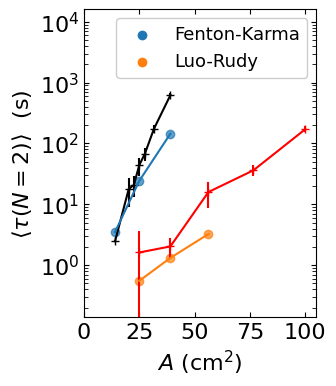

In [31]:
figsize=(3,4)
fontsize=15
alpha=0.7
# max_num_points_to_show = 3
max_num_points_to_show = 7
fig,ax=plt.subplots(figsize=figsize)
# color_lst = ['C0','C1']
color_lst = ['k','r']
mxpts=int(max_num_points_to_show)
#plot particle model results
for i,(D,g) in enumerate(df_taul.groupby('D')):
    color = f"C{i}"
    color = color_lst[i]
#     g.plot.scatter(x='A',y='tau',color=color,ax=ax,marker='+')
    ax.errorbar(g['A'][:mxpts], g['tau'][:mxpts], yerr=g['Delta_tau'][:mxpts],color=color,marker='+')
    
#plot full model results
ax.errorbar(A_values_fk[:mxpts], tau_values_fk[:mxpts], yerr=Delta_tau_values_fk[:mxpts],color='C0')#,label='Fenton-Karma')#,marker='+')
ax.errorbar(A_values_lr[:mxpts], tau_values_lr[:mxpts], yerr=Delta_tau_values_lr[:mxpts],color='C1')#,label='Luo-Rudy')#,marker='+')
ax.scatter(A_values_fk[:mxpts],tau_values_fk[:mxpts],c='C0',alpha=alpha,label='Fenton-Karma')
ax.scatter(A_values_lr[:mxpts],tau_values_lr[:mxpts],c='C1',alpha=alpha,label='Luo-Rudy')

# ax.scatter(xfk[:mxpts],yfk[:mxpts],c='C0',alpha=alpha,label='Fenton-Karma')
# ax.scatter(xlr[:mxpts],ylr[:mxpts],c='C1',alpha=alpha,label='Luo-Rudy')
#plot the simulated annealing fits
# # ax.scatter(xfk,yfk_pred,c='k',alpha=alpha,marker='+')#,label='Fenton-Karma')
# # ax.scatter(xlr,ylr_pred,c='k',alpha=alpha,marker='+')#,label='Luo-Rudy')
# # ax.scatter([A_fk],[tau_fk],marker='o',edgecolor='k',c='C0',#'k',
# #            alpha=1,label='Fenton-Karma')
# # ax.scatter([A_lr],[tau_lr],marker='o',edgecolor='k',c='C1',#c='k',
# #            alpha=1,label='Luo-Rudy')
# # xv=np.linspace(0,40,10)
# # ax.plot(xv,taubar0fk*np.exp(xv/A0fk),':',color='gray')#,'k--',lw=2)
# # xv=np.linspace(0,80,10)
# # ax.plot(xv,taubar0lr*np.exp(xv/A0lr),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,40,10)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foofk(xv),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foolr(xv),':',color='gray')#,'k--',lw=2)
ax.set_xticks([0,50,100,150])
# format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$\tau$  (s)',fontsize=16)
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$\langle\tau(N=2)\rangle$  (s)',fontsize=16)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
# ax.set_ylim([1e-2,100])
# # AddLegend(ax=ax,xy=(-0.12,0.240),fontsize=fontsize-3)
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,alpha=1.)#,frameon=False,ncol=1)
# leg.set_alpha(1.)
# , edgecolor="black")
leg.get_frame().set_alpha(None)
# leg.get_frame().set_facecolor((1, 1, 1, 1))
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.set_ylim([0.31392551380514033, 4e9])
# ax.set_xlim([0.,65])
ax.set_xlim([0.,105])
ax.set_ylim([0.13850549065122997,16000])
# ax.set_xlim([0.,100])
# ax.set_ylim([0.13850549065122997,12000])
# AddLege nd(ax=ax,xy=(0.05,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.7,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.4,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
# ax.tick_params(axis='y', which='minor', left=True)
ax.set_xticks([0,25,50,75,100])
# plt.minorticks_on()
plt.show()
ax.axis()
#og src: http://localhost:8888/notebooks/Simulating%20the%20paired%20birth%20death%20process.ipynb
plt.show()

In [25]:
# GOAL: plot tau vs. A for full and particle model at same A values conditioned on N0=2.
#DONE: visualize tau(N0=2) for the full models
#DONE: truncate/crop view to look as exponential as possible
#DONT: add in an extra 2 data points for the FK model. bc they're not tau | N0=2

In [26]:
beep(2)

-n 
-n 


0